In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import random
import math

def is_prime(n):
    if n <= 1:
        return False
    if n <= 3:
        return True
    if n % 2 == 0 or n % 3 == 0:
        return False
    i = 5
    while i * i <= n:
        if n % i == 0 or n % (i + 2) == 0:
            return False
        i += 6
    return True

def generate_primes(limit):
    primes = [2, 3]
    for num in range(5, limit, 6):
        if is_prime(num):
            primes.append(num)
        if is_prime(num + 2):
            primes.append(num + 2)
    return primes

limit = 3000
prime_list = generate_primes(limit)

# Find the number of the mod-p solutions to the equation y^2 = x^3 + ax + b
def count_solutions_elliptic_curve(a, b, p):
    count = 0
    for x in range(p):
        rhs = (x**3 + a*x + b) % p
        for y in range(p):
            lhs = (y**2) % p
            if lhs == rhs:
                count += 1
    return count


Data1 = []
for prime in prime_list:
    sols = count_solutions_elliptic_curve(-1, 0, prime)
    error = (prime + 1 - sols) / (2 * pow(prime, (1/2)))
    Data1.append([prime, sols, error])


In [3]:
print(Data1)

[[2, 2, 0.35355339059327373], [3, 3, 0.2886751345948129], [5, 7, -0.22360679774997896], [7, 7, 0.1889822365046136], [11, 11, 0.15075567228888181], [13, 7, 0.9707253433941511], [17, 15, 0.36380343755449945], [19, 19, 0.11470786693528087], [23, 23, 0.10425720702853739], [29, 39, -0.8356290217967335], [31, 31, 0.08980265101338746], [37, 39, -0.08219949365267865], [41, 31, 0.8589556903873333], [43, 43, 0.07624928516630233], [47, 47, 0.07293249574894728], [53, 39, 1.0302042296151677], [59, 59, 0.06509445549041194], [61, 71, -0.5761659596980319], [67, 67, 0.06108472217815261], [71, 71, 0.05933908290969266], [73, 79, -0.2926028679903264], [79, 79, 0.0562543950463012], [83, 83, 0.05488212999484517], [89, 79, 0.5829988340034981], [97, 79, 0.9645788568769381], [101, 103, -0.04975185951049946], [103, 103, 0.04926646390821466], [107, 107, 0.04833682445228318], [109, 103, 0.33523919982740297], [113, 127, -0.6114685644493382], [127, 127, 0.04436782547080569], [131, 131, 0.0436852028330519], [137, 15

4/4 [==============================] - 0s 470us/step


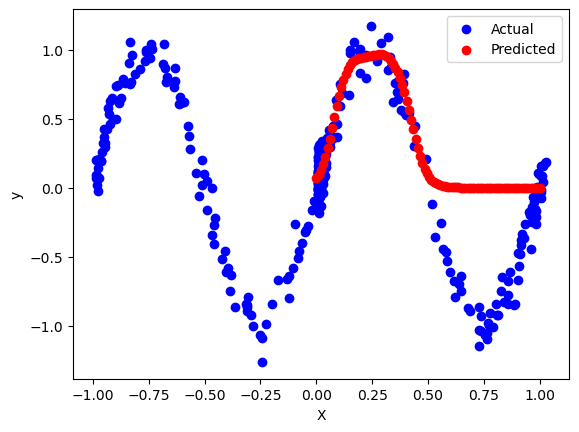

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

X = np.array([error for prime, sols, error in Data1])

y = np.sin(2 * np.pi * X) + np.random.normal(0, 0.1, len(X))

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(1,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid') 
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

model.fit(X, y, epochs=100, batch_size=16, verbose=0)

X_test = np.linspace(0, 1, 100)
y_pred = model.predict(X_test)

plt.scatter(X, y, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [23]:
import math

pairs = []

num_pairs = 5000

left = 0.0
right = math.pi

for _ in range(num_pairs):
    l = random.uniform(left, right)
    r = random.uniform(l, right)
    pairs.append((l, r))
    

Data1_angle = []
for prime, sols, error in Data1:
    if error < -1:
        error = -1
    if error > 1:
        error = 1
    angle = math.acos(error)
    Data1_angle.append((prime, sols, error, angle))
    
def count_prime_with_bounded_error(l, r):
    count = 0
    for prime, sols, error, angle in Data1_angle:        
        if l <= angle <= r:
            count += 1
    return count

In [24]:
print(count_prime_with_bounded_error(0, math.pi))

431


In [25]:
print(len(prime_list))

431


In [26]:
new_Data1 = []
for l, r in pairs:
    e = math.sin(l) * math.cos(l) - math.sin(r) * math.cos(r)
    new_Data1.append((l, r, e, r-l, r - l + e, count_prime_with_bounded_error(l, r)/len(prime_list)))
    
import pandas as pd

columns = ["Left", 'Right', 'Tri', 'Dif', 'Tot', 'Target']

df = pd.DataFrame(new_Data1, columns=columns)

print(df)

          Left     Right       Tri       Dif       Tot    Target
0     1.374251  2.913578  0.411716  1.539327  1.951043  0.756381
1     0.540496  0.747456 -0.057349  0.206960  0.149612  0.034803
2     1.522386  2.331239  0.547712  0.808852  1.356564  0.617169
3     0.500657  0.919654 -0.060993  0.418996  0.358003  0.067285
4     1.027189  2.028455  0.839046  1.001266  1.840311  0.665893
...        ...       ...       ...       ...       ...       ...
4995  0.771836  2.151639  0.958553  1.379803  2.338357  0.726218
4996  1.014157  1.882490  0.740470  0.868332  1.608802  0.640371
4997  0.868453  1.997633  0.869968  1.129180  1.999148  0.689095
4998  0.208477  2.555334  0.663353  2.346857  3.010211  0.877030
4999  2.619778  3.081048 -0.371721  0.461270  0.089549  0.069606

[5000 rows x 6 columns]


In [27]:
df.describe()

,Left,Right,Tri,Dif,Tot,Target
count,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000
mean,1.544251,2.350321,0.200459,0.806070,1.006528e+00,0.306234
std,0.904844,0.689162,0.377902,0.703100,9.867150e-01,0.332031
min,0.000031,0.038745,-0.493546,0.000071,3.415679e-11,0.000000
25%,0.752370,1.938503,-0.079399,0.229152,1.273891e-01,0.037123
50%,1.555319,2.537604,0.091895,0.594303,6.503780e-01,0.109049
75%,2.312345,2.916627,0.511639,1.240375,1.733874e+00,0.679814
max,3.141215,3.141578,0.999783,3.093081,3.141525e+00,0.976798


Mean Squared Error: 0.011675339101336694


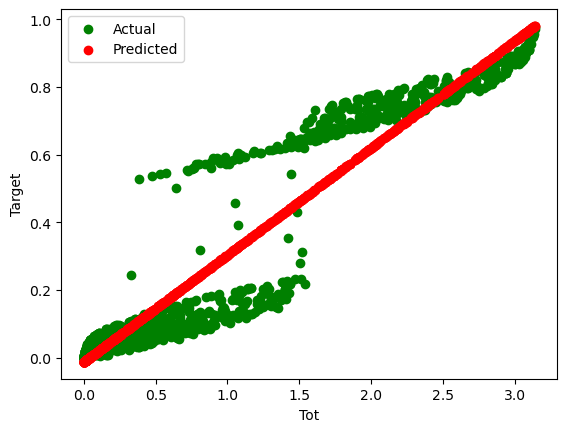

In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

X = df[['Tot']]  
y = df['Target'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

plt.scatter(X_test, y_test, color='green', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Tot')
plt.ylabel('Target')
plt.legend()
plt.show()


In [30]:
coefficients = model.coef_
intercept = model.intercept_

print("Coefficient for Tot:", coefficients[0])
print()

Coefficient for Tot: 0.4100142394993299



In [31]:
print(1/math.pi)

0.3183098861837907


Mean Squared Error: 0.024376546096285354


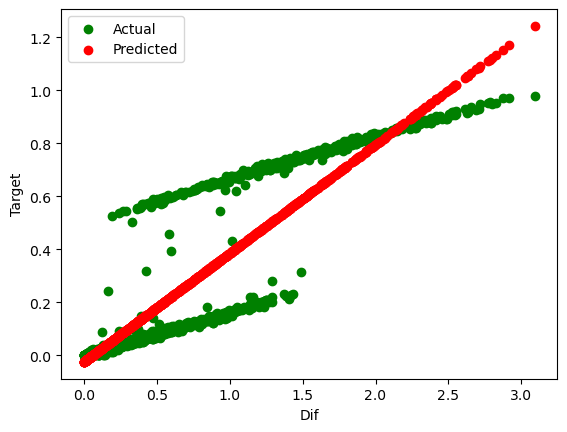

In [32]:
X = df[['Dif']]  
y = df['Target'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

plt.scatter(X_test, y_test, color='green', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Dif')
plt.ylabel('Target')
plt.legend()
plt.show()

In [33]:
coefficients = model.coef_
intercept = model.intercept_

print("Coefficient for Dif:", coefficients[0])
print()

Coefficient for Dif: 0.4100142394993299



Mean Squared Error: 0.011038595415089482


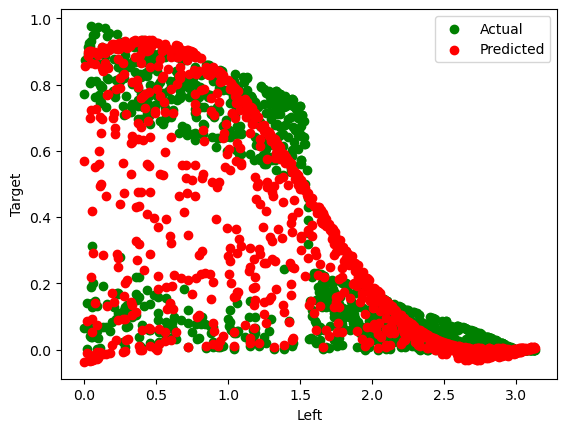

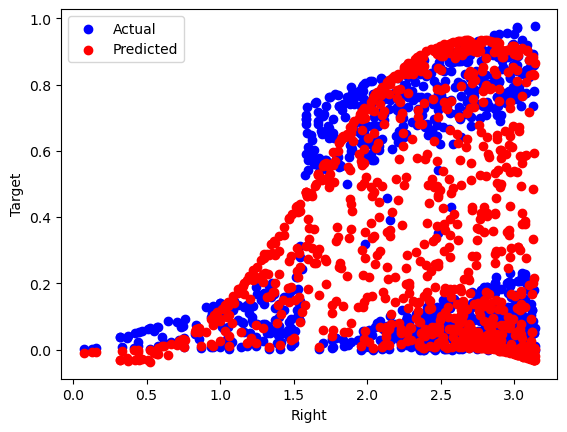

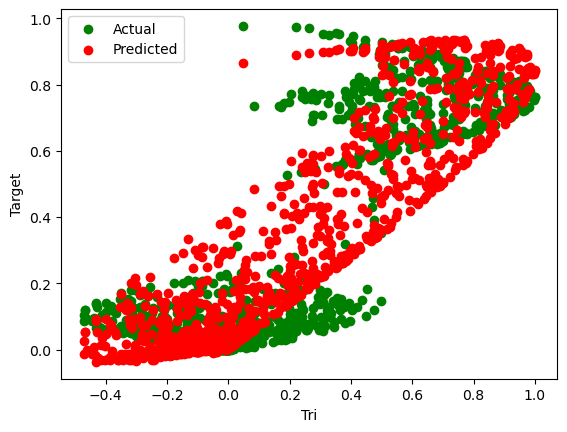

In [34]:
X = df[['Left', 'Right', 'Tri']]  
y = df['Target'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

plt.scatter(X_test['Left'], y_test, color='green', label='Actual')
plt.scatter(X_test['Left'], y_pred, color='red', label='Predicted')
plt.xlabel('Left')
plt.ylabel('Target')
plt.legend()
plt.show()

plt.scatter(X_test['Right'], y_test, color='blue', label='Actual')
plt.scatter(X_test['Right'], y_pred, color='red', label='Predicted')
plt.xlabel('Right')
plt.ylabel('Target')
plt.legend()
plt.show()

plt.scatter(X_test['Tri'], y_test, color='green', label='Actual')
plt.scatter(X_test['Tri'], y_pred, color='red', label='Predicted')
plt.xlabel('Tri')
plt.ylabel('Target')
plt.legend()
plt.show()

In [35]:
coefficients = model.coef_
intercept = model.intercept_

print("Coefficient for Left:", coefficients[0])
print("Coefficient for Right:", coefficients[1])
print("Coefficient for Tri:", coefficients[2])
print()

Coefficient for Left: -0.2709169915395576
Coefficient for Right: 0.2738557532638433
Coefficient for Tri: 0.41164083216295994



In [14]:
# Find the number of the mod-p solutions to the hyperelliptic equation y^2 = x^a - 1
def count_solutions_hyperelliptic_curve(a, p):
    count = 0
    for x in range(p):
        rhs = (x**a - 1) % p
        for y in range(p):
            lhs = (y**2) % p
            if lhs == rhs:
                count += 1
    return count

4/4 [==============================] - 0s 534us/step


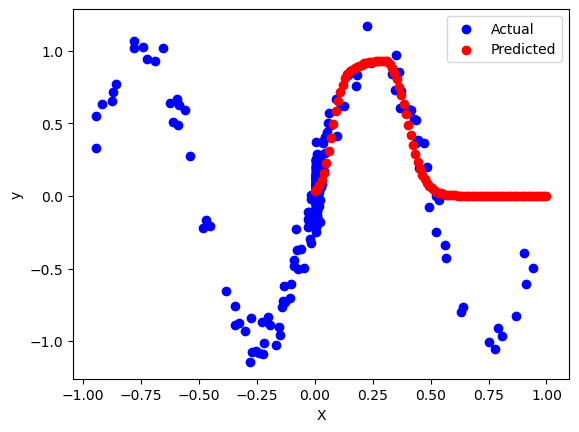

In [15]:
power = 5
degree = (power - 1) // 2

Data3 = []
for prime in prime_list:
    sols = count_solutions_hyperelliptic_curve(power, prime)
    error = (prime + 1 - sols) / (2 * degree * pow(prime, (1/2)))
    Data3.append((prime, sols, error))
    
X = np.array([error for prime, sols, error in Data3])

y = np.sin(2 * np.pi * X) + np.random.normal(0, 0.1, len(X))

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(1,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid') 
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

model.fit(X, y, epochs=100, batch_size=16, verbose=0)

X_test = np.linspace(0, 1, 100)
y_pred = model.predict(X_test)

plt.scatter(X, y, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [16]:
Data3_angle = []
for prime, sols, error in Data3:
    if error < -1:
        error = -1
    if error > 1:
        error = 1
    angle = math.acos(error)
    Data3_angle.append((prime, sols, error, angle))
    
new_Data3 = []
for l, r in pairs:
    new_Data3.append((l, r, r - l, count_prime_with_bounded_error(l, r)/len(prime_list)))
    
columns = ["Left", 'Right', 'Dif', 'Target']

df = pd.DataFrame(new_Data3, columns=columns)

print(df)

          Left     Right       Dif    Target
0     2.426882  3.132605  0.705723  0.095128
1     2.331765  3.065931  0.734166  0.102088
2     2.139292  2.427444  0.288152  0.044084
3     0.875984  1.572165  0.696181  0.612529
4     2.205139  3.073984  0.868846  0.129930
...        ...       ...       ...       ...
4995  2.034076  2.190907  0.156832  0.034803
4996  2.698405  2.703201  0.004796  0.000000
4997  1.765866  2.566333  0.800466  0.136891
4998  2.626521  2.673884  0.047362  0.006961
4999  2.148388  2.616827  0.468438  0.067285

[5000 rows x 4 columns]


In [17]:
df.describe()

,Left,Right,Dif,Target
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.573708,2.374994,0.801286,0.307192
std,0.905168,0.680929,0.698816,0.332806
min,0.000230,0.071873,0.000083,0.000000
25%,0.787872,1.974695,0.219492,0.034803
50%,1.562932,2.570178,0.605758,0.111369
75%,2.368129,2.932716,1.224063,0.682715
max,3.141010,3.141576,3.086780,0.976798


Mean Squared Error: 0.02621696384103819


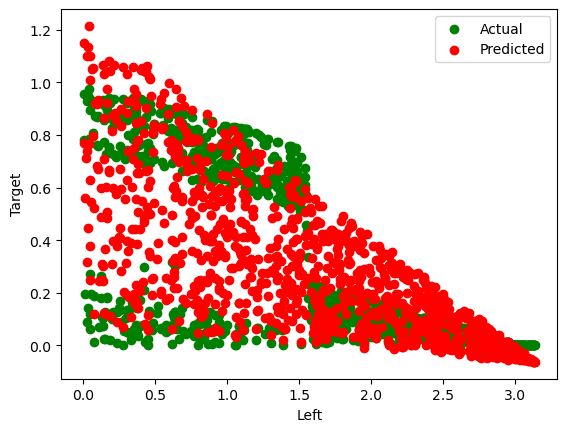

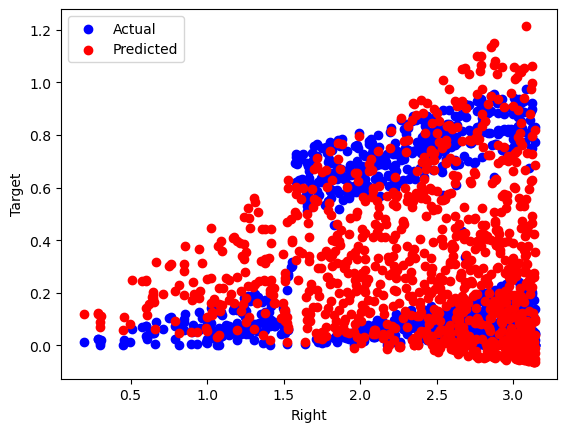

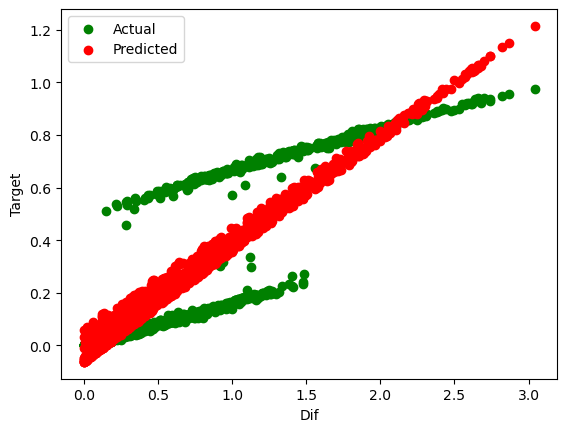

In [18]:
X = df[['Left', 'Right', 'Dif']]  
y = df['Target'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

plt.scatter(X_test['Left'], y_test, color='green', label='Actual')
plt.scatter(X_test['Left'], y_pred, color='red', label='Predicted')
plt.xlabel('Left')
plt.ylabel('Target')
plt.legend()
plt.show()

plt.scatter(X_test['Right'], y_test, color='blue', label='Actual')
plt.scatter(X_test['Right'], y_pred, color='red', label='Predicted')
plt.xlabel('Right')
plt.ylabel('Target')
plt.legend()
plt.show()

plt.scatter(X_test['Dif'], y_test, color='green', label='Actual')
plt.scatter(X_test['Dif'], y_pred, color='red', label='Predicted')
plt.xlabel('Dif')
plt.ylabel('Target')
plt.legend()
plt.show()

In [20]:
coefficients = model.coef_
intercept = model.intercept_

print("Coefficient for Left:", coefficients[0])
print("Coefficient for Right:", coefficients[1])
print("Coefficient for Dif:", coefficients[2])
print()

Coefficient for Left: -1978065653809.0605
Coefficient for Right: 1978065653809.016
Coefficient for Dif: -1978065653808.6414



Mean Squared Error (MSE): 0.022124942762640154
R-squared (R2) Score: 0.8092149188256134


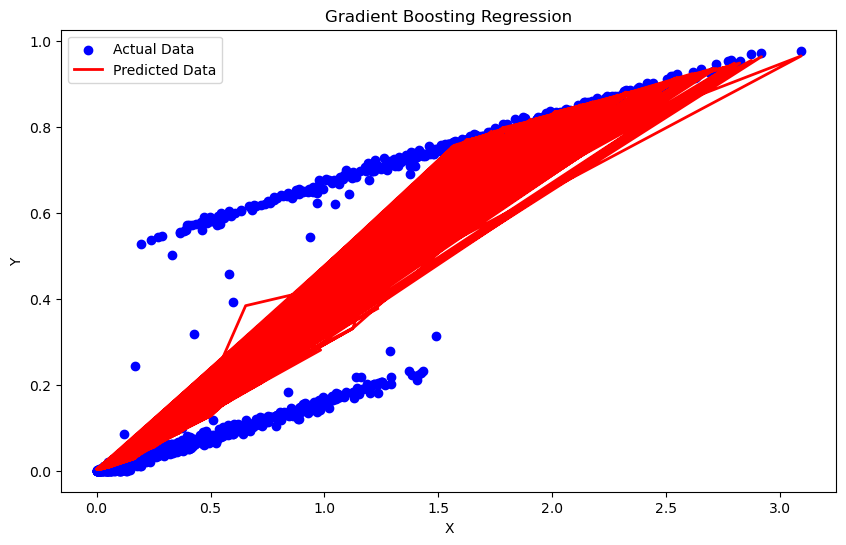

In [45]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


X = df[['Dif']]  
y = df['Target'] 


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=1)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Data')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Gradient Boosting Regression")
plt.show()